## 情人节词云示例

### 1.引入相关的库包：

In [1]:
#coding:utf-8
__author__ = 'Hanxiaoyang'
import jieba    #分词包
import numpy    #numpy计算包
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import pandas   
import matplotlib.pyplot as plt

from wordcloud import WordCloud#词云包

### 2.导入大话西游txt文件，分词：

In [6]:
file=codecs.open(u"大话西游.txt",'r')
content=file.read()
file.close()
segment=[]
segs=jieba.cut(content) #切词，“么么哒”才能出现
for seg in segs:
    if len(seg)>1 and seg!='\r\n':
        segment.append(seg)
print segment

['\xe8\x87\xb3\xe5\xb0\x8a\xe5\xae\x9d', '\xe5\xb9\xb2\xe4\xbb\x80\xe4\xb9\x88', '\xe7\xb4\xab\xe9\x9c\x9e', '\xe6\x84\x8f\xe4\xb8\xad\xe4\xba\xba', '\xe9\x99\x84\xe8\xbf\x91', '\xe8\x87\xb3\xe5\xb0\x8a\xe5\xae\x9d', '\xe7\x9c\x8b\xe5\x88\xb0', '\xe7\xb4\xab\xe9\x9c\x9e', '\xe6\xb2\xa1\xe6\x9c\x89', '\xe5\x9b\xa0\xe4\xb8\xba', '\xe7\xb4\xab\xe9\x9d\x92', '\xe5\xae\x9d\xe5\x89\x91', '\xe5\x8f\x91\xe5\x87\xba', '\xe8\xae\xaf\xe5\x8f\xb7', '\xe8\x87\xb3\xe5\xb0\x8a\xe5\xae\x9d', '\xe5\x93\xaa\xe5\x84\xbf', '\xe5\x98\x9f\xe5\x98\x9f\xe5\xa3\xb0', '\xe7\xb4\xab\xe9\x9c\x9e', '\xe8\x87\xb3\xe5\xb0\x8a\xe5\xae\x9d', '\xe5\xae\x9d\xe5\x89\x91', '\xe6\xb2\xa1\xe5\x98\x9f', '\xe7\xb4\xab\xe9\x9c\x9e', '\xe5\x93\x8e\xe5\x91\x80', '\xe7\x9f\xa5\xe9\x81\x93', '\xe5\x90\xac\xe4\xb8\x8d\xe8\xa7\x81', '\xe5\xae\xb3\xe6\x80\x95', '\xe4\xb8\x8d\xe9\xaa\x97\xe4\xbd\xa0', '\xe7\x9c\x9f\xe7\x9a\x84', '\xe5\xae\xb3\xe6\x80\x95', '\xe8\x87\xb3\xe5\xb0\x8a\xe5\xae\x9d', '\xe4\xbb\x80\xe4\xb9\x88', '\xe7\xb4\x

### 3.去停用词（“多喝热水”和闹嘴的小细节可以在这里抹去）

In [9]:
words_df=pandas.DataFrame({'segment':segment})
words_df.head()
print words_df.head()
wcas

  segment
0     至尊宝
1     干什么
2      紫霞
3     意中人
4      附近


### 4.统计词频（情侣对话日常高频词）

In [14]:
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort(columns="计数",ascending=False)
words_stat

/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,segment,计数
265,紫霞,80
281,至尊宝,52
171,悟空,18
165,怎么,11
33,不要,9
240,男子,8
205,月光宝盒,7
220,没有,7
201,是不是,7
21,不会,6


### 5.做词云（开启亮瞎眼么么哒模式）

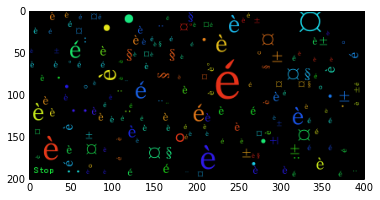

In [15]:
%matplotlib inline
wordcloud=WordCloud(font_path="simhei.ttf",background_color="black")
wordcloud=wordcloud.fit_words(words_stat.head(1000).itertuples(index=False))
plt.imshow(wordcloud)
plt.show()

Using matplotlib backend: MacOSX


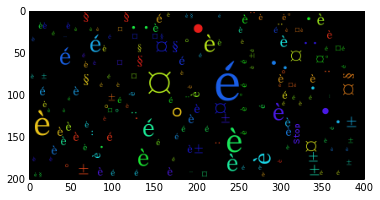

In [16]:
%matplotlib
wordcloud=WordCloud(font_path="simhei.ttf",background_color="black")
wordcloud=wordcloud.fit_words(words_stat.head(1000).itertuples(index=False))
plt.imshow(wordcloud)
plt.show()

### 6.自定义背景图做词云（让他看到你的心）

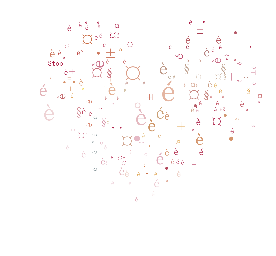

In [17]:
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
%matplotlib inline
bimg=imread('heart.jpeg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='simhei.ttf')
wordcloud=wordcloud.fit_words(words_stat.head(4000).itertuples(index=False))
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.show()

In [10]:
%matplotlib
bimg=imread('heart.jpeg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='simhei.ttf')
wordcloud=wordcloud.fit_words(words_stat.head(39769).itertuples(index=False))
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.show()

Using matplotlib backend: MacOSX
